## Small Image Classification Using Convolutional Neural Network (CNN)
In this notebook, we will classify small images cifar10 dataset from tensorflow keras datasets. There are total 10 classes as shown below. We will use CNN for classification

In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [7]:
X_test.shape

(10000, 32, 32, 3)

In [8]:
y_train.shape

(50000, 1)

In [9]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

Reshape to one dimensional array is fine

In [10]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [11]:
classes = ['airplane', 'automobile', 'bird', 'car', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [32]:
y_test[:5]

array([[3],
       [8],
       [8],
       [0],
       [6]], dtype=uint8)

In [33]:
y_test = y_test.reshape(-1,)
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [13]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

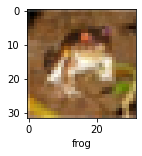

In [14]:
plot_sample(X_train, y_train, 0)

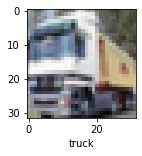

In [15]:
plot_sample(X_train, y_train, 1)

Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) 
and each value in the channel can range from 0 to 255. Hence to normalize 
in 0 --> 1 range, we need to divied it by 255.

### Normalizing the training data

In [16]:
X_train = X_train / 255.0
X_test = X_test / 255.0

### Build simple artificial neural network for image classification

In [17]:
ann = models.Sequential([
    layers.Flatten(input_shape = (32, 32, 3)),
    layers.Dense(3000, activation = 'relu'),
    layers.Dense(1000, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

ann.compile(optimizer = 'SGD', loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

ann.fit(X_train, y_train, epochs = 5)

Epoch 1/5
1563/1563 [==============================] - 154s 98ms/step - loss: 1.8120 - accuracy: 0.3553
Epoch 2/5
1563/1563 [==============================] - 146s 94ms/step - loss: 1.5401 - accuracy: 0.4580
Epoch 4/5
1563/1563 [==============================] - 149s 95ms/step - loss: 1.4800 - accuracy: 0.4797
Epoch 5/5
1563/1563 [==============================] - 139s 89ms/step - loss: 1.4313 - accuracy: 0.4973


#### You can see that at the end of 5 epochs,a ccuracy is at arounf 49%

#### Confusion matrix

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.48      0.51      0.49      1000
           1       0.46      0.77      0.58      1000
           2       0.38      0.35      0.36      1000
           3       0.33      0.35      0.34      1000
           4       0.53      0.30      0.38      1000
           5       0.45      0.26      0.33      1000
           6       0.55      0.50      0.53      1000
           7       0.67      0.40      0.50      1000
           8       0.41      0.80      0.54      1000
           9       0.52      0.37      0.43      1000

    accuracy                           0.46     10000
   macro avg       0.48      0.46      0.45     10000
weighted avg       0.48      0.46      0.45     10000



#### Now let us build a convolutional neural network to train our images

In [23]:
cnn = models.Sequential([
    layers.Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(10, activation = 'softmax')
])

cnn.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
           metrics = ['accuracy'])

In [24]:
cnn.fit(X_train, y_train, epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 129s 44ms/step - loss: 1.4603 - accuracy: 0.4744
Epoch 2/10
1563/1563 [==============================] - 82s 52ms/step - loss: 1.1061 - accuracy: 0.61340s - loss: 1
Epoch 3/10
1563/1563 [==============================] - 81s 52ms/step - loss: 0.9009 - accuracy: 0.6840
Epoch 5/10
1563/1563 [==============================] - 75s 48ms/step - loss: 0.8407 - accuracy: 0.7099
Epoch 6/10
1563/1563 [==============================] - 74s 47ms/step - loss: 0.7864 - accuracy: 0.7277
Epoch 7/10
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7414 - accuracy: 0.7410
Epoch 8/10
1563/1563 [==============================] - 65s 41ms/step - loss: 0.6996 - accuracy: 0.7554
Epoch 9/10
1563/1563 [==============================] - 72s 46ms/step - loss: 0.6606 - accuracy: 0.7688
Epoch 10/10
1563/1563 [==============================] - 80s 51ms/step - loss: 0.6190 - accuracy: 0.7813


#### With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features

In [26]:
cnn.evaluate(X_test, y_test)

313/313 [==============================] - 11s 14ms/step - loss: 0.9382 - accuracy: 0.6889


[0.9382355213165283, 0.6888999938964844]

In [27]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[2.84392299e-04, 3.04236572e-04, 1.03628626e-02, 8.50978851e-01,
        1.20684388e-03, 1.27517149e-01, 6.26758346e-03, 1.06955576e-03,
        1.63580151e-03, 3.72827606e-04],
       [3.05703463e-04, 4.68711779e-02, 1.44823671e-05, 4.84727498e-05,
        1.75346906e-06, 2.23230458e-07, 1.97043604e-09, 1.41724058e-07,
        9.51123536e-01, 1.63456192e-03],
       [2.73731619e-01, 2.47395203e-01, 9.57322214e-03, 3.10803186e-02,
        3.27311526e-03, 4.15548729e-03, 9.50783782e-04, 1.95681546e-02,
        3.93801153e-01, 1.64709613e-02],
       [9.31814432e-01, 4.36833426e-02, 7.42291752e-03, 3.13646183e-03,
        2.22833920e-03, 2.44049697e-05, 1.76365738e-05, 2.52339116e-04,
        1.08846305e-02, 5.35560772e-04],
       [4.70881469e-06, 8.00509861e-06, 5.21136150e-02, 4.57484089e-02,
        3.11602235e-01, 3.19924508e-03, 5.87124348e-01, 4.18055197e-06,
        1.89794271e-04, 5.47902073e-06]], dtype=float32)

In [34]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 6]

In [35]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

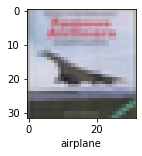

In [36]:
plot_sample(X_test, y_test, 3)

In [42]:
classes[y_classes[3]]

'airplane'

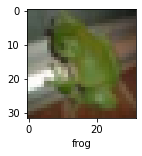

In [37]:
plot_sample(X_test, y_test, 7)

In [43]:
classes[y_classes[7]]

'frog'

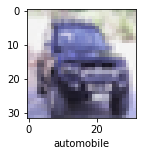

In [38]:
plot_sample(X_test, y_test, 9)

In [44]:
classes[y_classes[9]]

'truck'

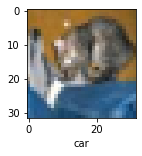

In [48]:
plot_sample(X_test, y_test, 0)

In [49]:
classes[y_classes[0]]

'car'